# importing needed libraries

In [3]:
# importing needed libraries
import cv2
import math
import numpy as np
import pandas as pd
from google.colab import drive
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

# connecting to google drive to get the data

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preperation: Retreiving Anomaly and Normal from google drive





In [55]:
def get_file_paths(directory):
    """Returns a list of full file paths for a given directory."""
    return [os.path.join(directory, file) for file in os.listdir(directory)]

# Base directory for video data
base_dir = "/content/drive/MyDrive/all files/Video Data"

# Anomaly video categories and their respective subdirectories
anomaly_categories = {
    "Assault": "Anomaly-Videos-Part-1/Assault",
    "Arson" : "Anomaly-Videos-Part-1/Arson",
    "Arrest" : "Anomaly-Videos-Part-1/Arrest",
    "Abuse" : "Anomaly-Videos-Part-1/Abuse",
    "Fighting": "Anomaly-Videos-Part-2/Fighting",
    "Explosion" : "Anomaly-Videos-Part-2/Explosion",
    "Burglary" : "Anomaly-Videos-Part-2/Burglary",
    "Shooting" : "Anomaly-Videos-Part-3/Shooting",
    "Robbery" : "Anomaly-Videos-Part-3/Robbery",
    "RoadAccidents" : "Anomaly-Videos-Part-3/RoadAccidents",
    "Vandalism" : "Anomaly-Videos-Part-4/Vandalism",
    "Shoplifting" : "Anomaly-Videos-Part-4/Shoplifting",
    "Stealing" : "Anomaly-Videos-Part-4/Stealing",


}

# Collect anomaly video paths
anomaly_videos = {category: get_file_paths(os.path.join(base_dir, path)) for category, path in anomaly_categories.items()}
anomaly_frames = base_dir + "/Temporal_Anomaly_Annotation_for_Testing_Videos (1).txt"
# Normal video paths
test_normal_dir = "Testing_Normal_Videos_Anomaly"
train_normal_dirs = [
    "Normal_Videos_for_Event_Recognition",
    "Training-Normal-Videos-Part-1(1)/Training-Normal-Videos-Part-1",
    "Training-Normal-Videos-Part-2(1)/Training-Normal-Videos-Part-2"
]

test_Normal = get_file_paths(os.path.join(base_dir, test_normal_dir))
Train_Normal = [video for subdir in train_normal_dirs for video in get_file_paths(os.path.join(base_dir, subdir))]

In [62]:
test_Normal

['/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_576_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_597_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_603_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_606_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_621_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_634_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_641_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_656_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_Normal_Videos_Anomaly/Normal_Videos_872_x264.mp4',
 '/content/drive/MyDrive/all files/Video Data/Testing_N

# EDA - Exploratory Data Analysis

## Duration of videos - Anomalies

In [56]:
def get_video_duration(video_path):
  """
  Calculates the duration of a video in seconds.
  """
  video_path = video_path.decode("utf-8") if isinstance(video_path, bytes) else video_path
  cap = cv2.VideoCapture(video_path)
  fps = cap.get(cv2.CAP_PROP_FPS)
  frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
  duration = frame_count / fps
  cap.release()
  return duration

new_dct = {}
# Get the video durations for all anomaly videos
video_durations = []
for key, item in anomaly_videos.items():
  print(f"*** working on {key} ***")
  new_dct[key] = []
  for i in range(len(item)):
    duration = get_video_duration(item[i])
    new_dct[key].append(duration)
  print(f"***Done with {key} ***")
# Group the durations by video type
abuse_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Abuse"]
arrest_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Arrest"]
arson_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Arson"]
fighting_duration = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Fighting"]
explosion_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Explosion"]
stealing_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Stealing"]
robbery_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Robbery"]
vandalism_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Vandalism"]
shoplifting_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Shoplifting"]
burglary_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Burglary"]
shooting_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Shooting"]
roadaccidents_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "RoadAccidents"]
assault_durations = [duration[i] for key, duration in new_dct.items() for i in range(len(duration)) if key  == "Assault"]





*** working on Assault ***
***Done with Assault ***
*** working on Arson ***
***Done with Arson ***
*** working on Arrest ***
***Done with Arrest ***
*** working on Abuse ***
***Done with Abuse ***
*** working on Fighting ***
***Done with Fighting ***
*** working on Explosion ***
***Done with Explosion ***
*** working on Burglary ***
***Done with Burglary ***
*** working on Shooting ***
***Done with Shooting ***
*** working on Robbery ***
***Done with Robbery ***
*** working on RoadAccidents ***
***Done with RoadAccidents ***
*** working on Vandalism ***
***Done with Vandalism ***
*** working on Shoplifting ***
***Done with Shoplifting ***
*** working on Stealing ***
***Done with Stealing ***


In [60]:
# Calculate minimum and maximum durations for each category
min_abuse = min(abuse_durations)
max_abuse = max(abuse_durations)

min_arson = min(arson_durations)
max_arson = max(arson_durations)

min_fighting = min(fighting_duration)
max_fighting = max(fighting_duration)

min_explosion = min(explosion_durations)
max_explosion = max(explosion_durations)

min_stealing = min(stealing_durations)
max_stealing = max(stealing_durations)

min_robbery = min(robbery_durations)
max_robbery = max(robbery_durations)

min_vandalism = min(vandalism_durations)
max_vandalism = max(vandalism_durations)

min_shoplifting = min(shoplifting_durations)
max_shoplifting = max(shoplifting_durations)

min_burglary = min(burglary_durations)
max_burglary = max(burglary_durations)

min_shooting = min(shooting_durations)
max_shooting = max(shooting_durations)

min_roadaccidents = min(roadaccidents_durations)
max_roadaccidents = max(roadaccidents_durations)

min_assault = min(assault_durations)
max_assault = max(assault_durations)


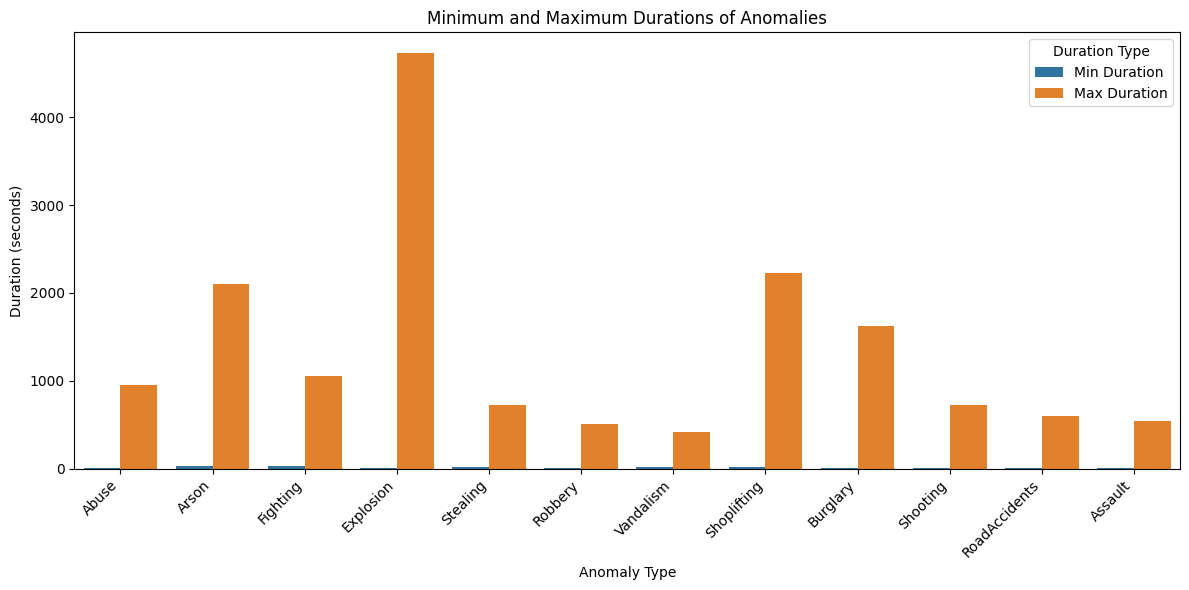

In [57]:
anomaly_types = [
    "Abuse", "Arson", "Fighting", "Explosion", "Stealing", "Robbery",
    "Vandalism", "Shoplifting", "Burglary", "Shooting", "RoadAccidents", "Assault"
]
min_durations = [
    min_abuse, min_arson, min_fighting, min_explosion, min_stealing, min_robbery,
    min_vandalism, min_shoplifting, min_burglary, min_shooting, min_roadaccidents, min_assault
]
max_durations = [
    max_abuse, max_arson, max_fighting, max_explosion, max_stealing, max_robbery,
    max_vandalism, max_shoplifting, max_burglary, max_shooting, max_roadaccidents, max_assault
]

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Anomaly Type": anomaly_types,
    "Min Duration": min_durations,
    "Max Duration": max_durations
})

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df, id_vars=["Anomaly Type"], value_vars=["Min Duration", "Max Duration"], var_name="Duration Type", value_name="Duration")

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Anomaly Type", y="Duration", hue="Duration Type", data=df_melted)
plt.title("Minimum and Maximum Durations of Anomalies")
plt.xlabel("Anomaly Type")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


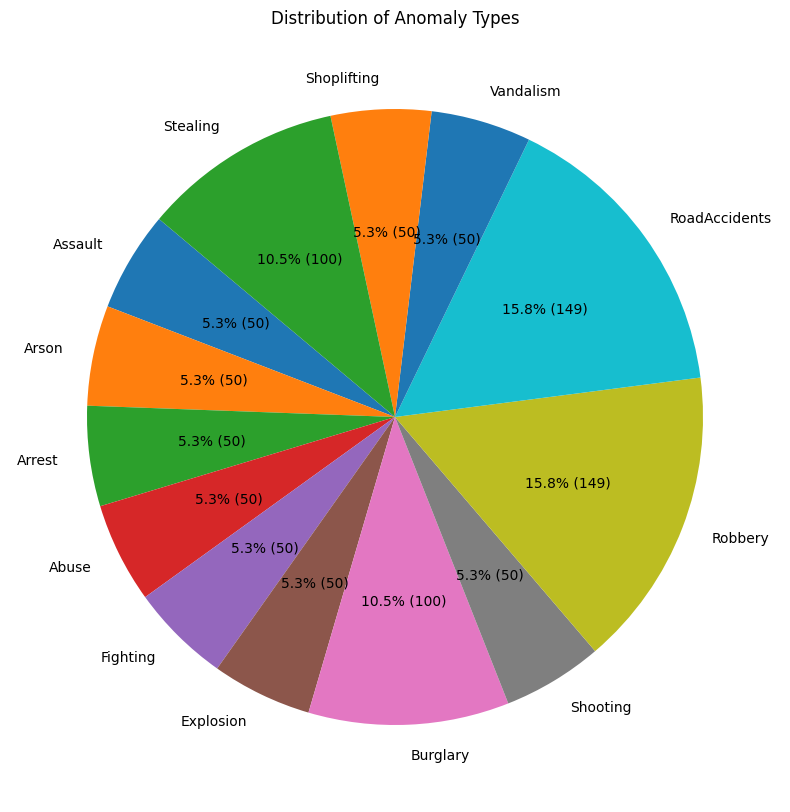

In [59]:
# Calculate the number of videos for each anomaly type
anomaly_counts = {key: len(value) for key, value in anomaly_videos.items()}

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(anomaly_counts.values(), labels=anomaly_counts.keys(), autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*sum(anomaly_counts.values()))})", startangle=140)
plt.title("Distribution of Anomaly Types")
plt.show()


## Duration of videos - Normal

In [63]:
# Get the video durations for all videos
normal_video_durations = []

for video_path in test_Normal:
    duration = get_video_duration(video_path)
    normal_video_durations.append(duration)
for video_path in Train_Normal:
    duration = get_video_duration(video_path)
    normal_video_durations.append(duration)

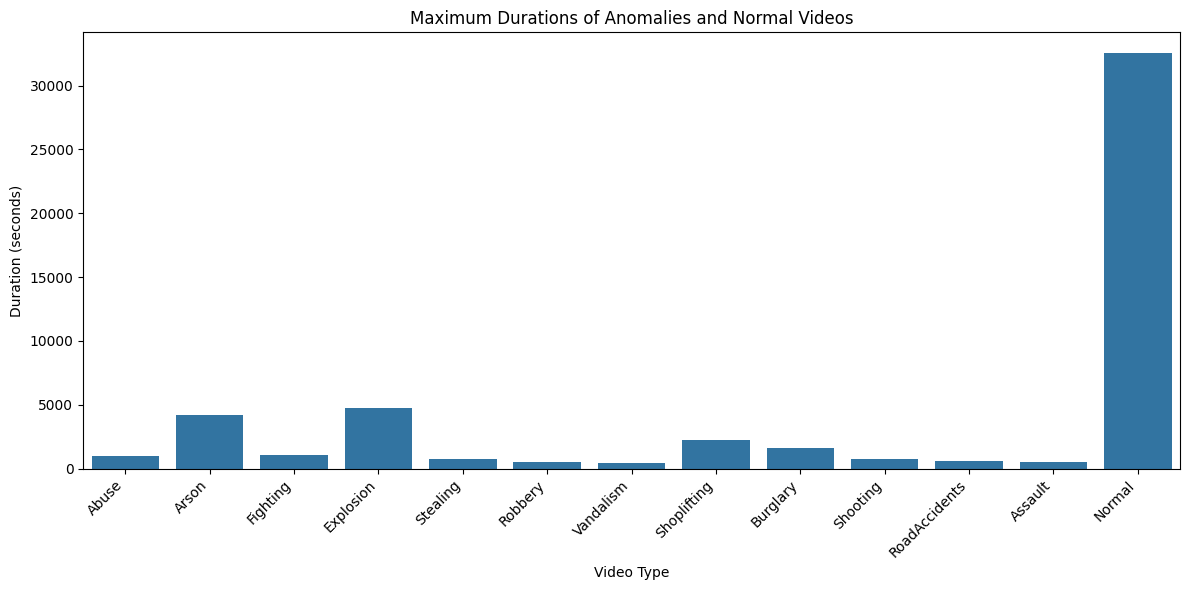

In [66]:
min_normal = min(normal_video_durations)
max_normal = max(normal_video_durations)

# Create a list of video types and their corresponding max durations
video_types = [
    "Abuse", "Arson", "Fighting", "Explosion", "Stealing", "Robbery",
    "Vandalism", "Shoplifting", "Burglary", "Shooting", "RoadAccidents", "Assault",
    "Normal"
]
max_durations = [
    max_abuse, max_arson, max_fighting, max_explosion, max_stealing, max_robbery,
    max_vandalism, max_shoplifting, max_burglary, max_shooting, max_roadaccidents, max_assault,
    max_normal
]

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Video Type": video_types,
    "Max Duration": max_durations
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Video Type", y="Max Duration", data=df)
plt.title("Maximum Durations of Anomalies and Normal Videos")
plt.xlabel("Video Type")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


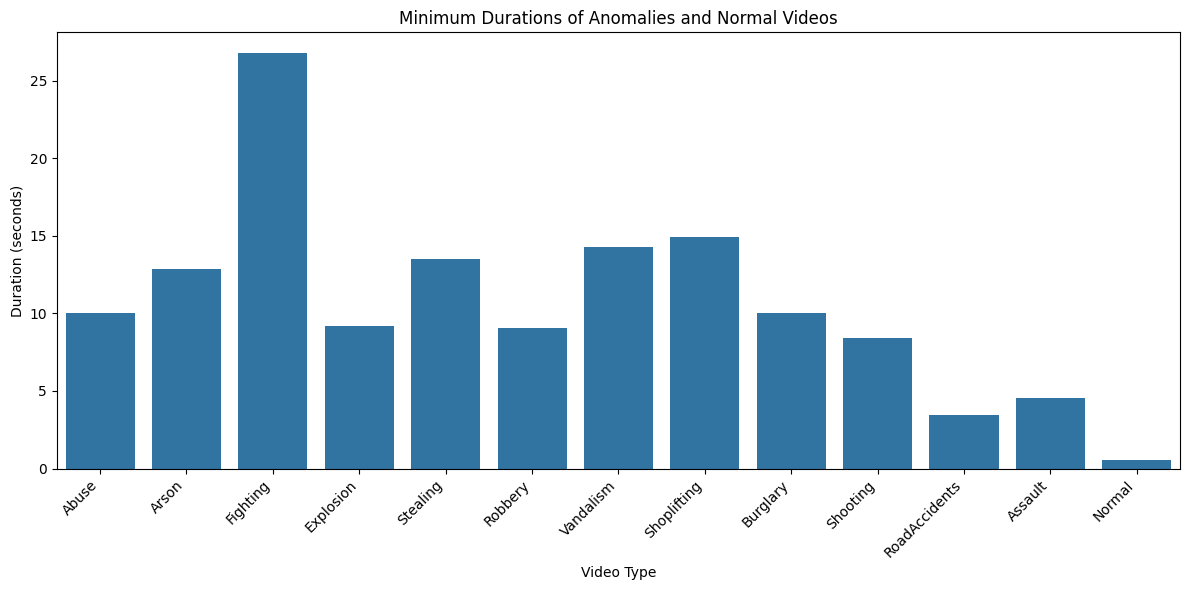

In [73]:
min_durations = [
    min_abuse, min_arson, min_fighting, min_explosion, min_stealing, min_robbery,
    min_vandalism, min_shoplifting, min_burglary, min_shooting, min_roadaccidents, min_assault,
    min_normal
]

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Video Type": video_types,
    "Min Duration": min_durations
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Video Type", y="Min Duration", data=df)
plt.title("Minimum Durations of Anomalies and Normal Videos")
plt.xlabel("Video Type")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


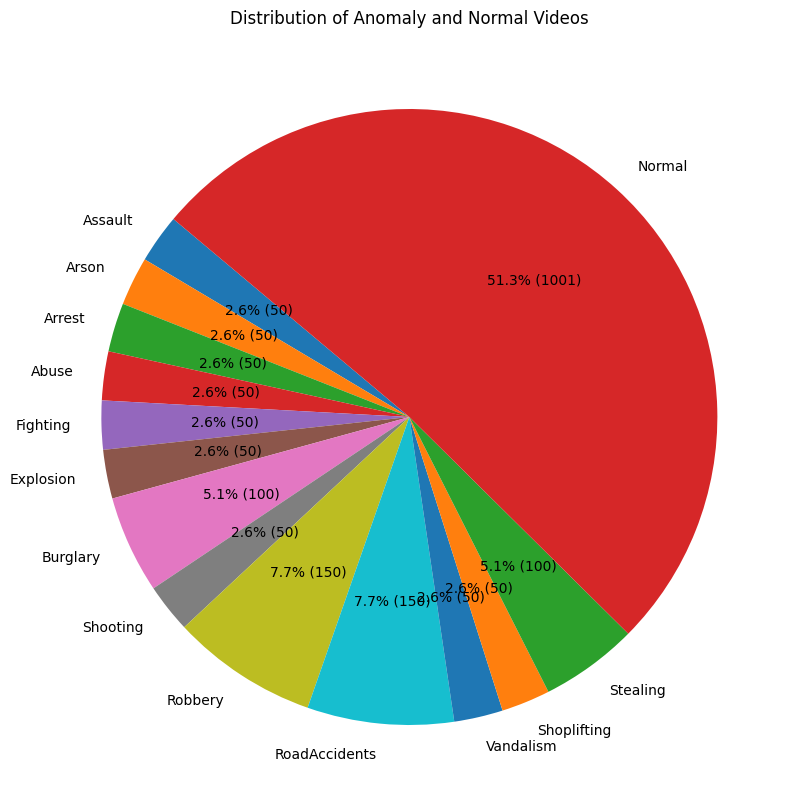

In [70]:
# prompt: provide a full pie like before but with normal also

import matplotlib.pyplot as plt
# Calculate the number of videos for each anomaly type
anomaly_counts = {key: len(value) for key, value in anomaly_videos.items()}

# Add the count of normal videos
anomaly_counts['Normal'] = len(test_Normal) + len(Train_Normal)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(anomaly_counts.values(), labels=anomaly_counts.keys(), autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*sum(anomaly_counts.values()))})", startangle=140)
plt.title("Distribution of Anomaly and Normal Videos")
plt.show()


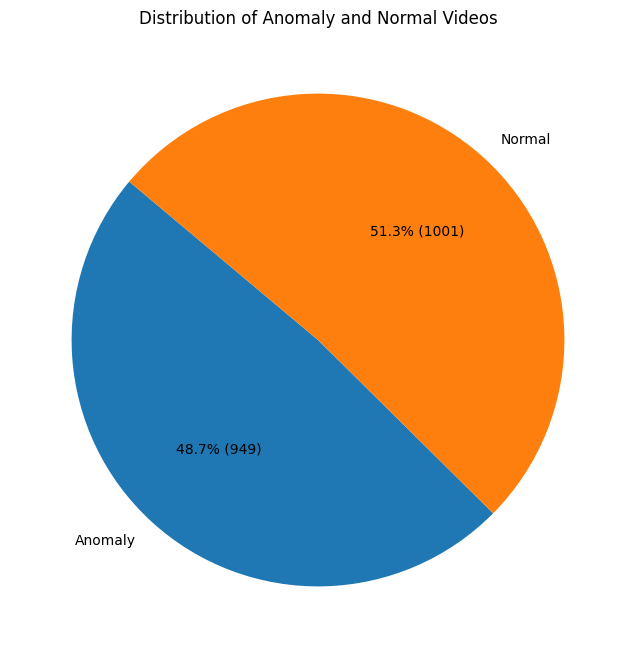

In [72]:
import matplotlib.pyplot as plt
# Calculate the total number of anomaly videos
total_anomaly = sum(len(value) for value in anomaly_videos.values())

# Calculate the total number of normal videos
total_normal = len(test_Normal) + len(Train_Normal)

# Create a dictionary for the pie chart
data = {'Anomaly': total_anomaly, 'Normal': total_normal}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data.values(), labels=data.keys(), autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*sum(data.values()))})", startangle=140)
plt.title("Distribution of Anomaly and Normal Videos")
plt.show()


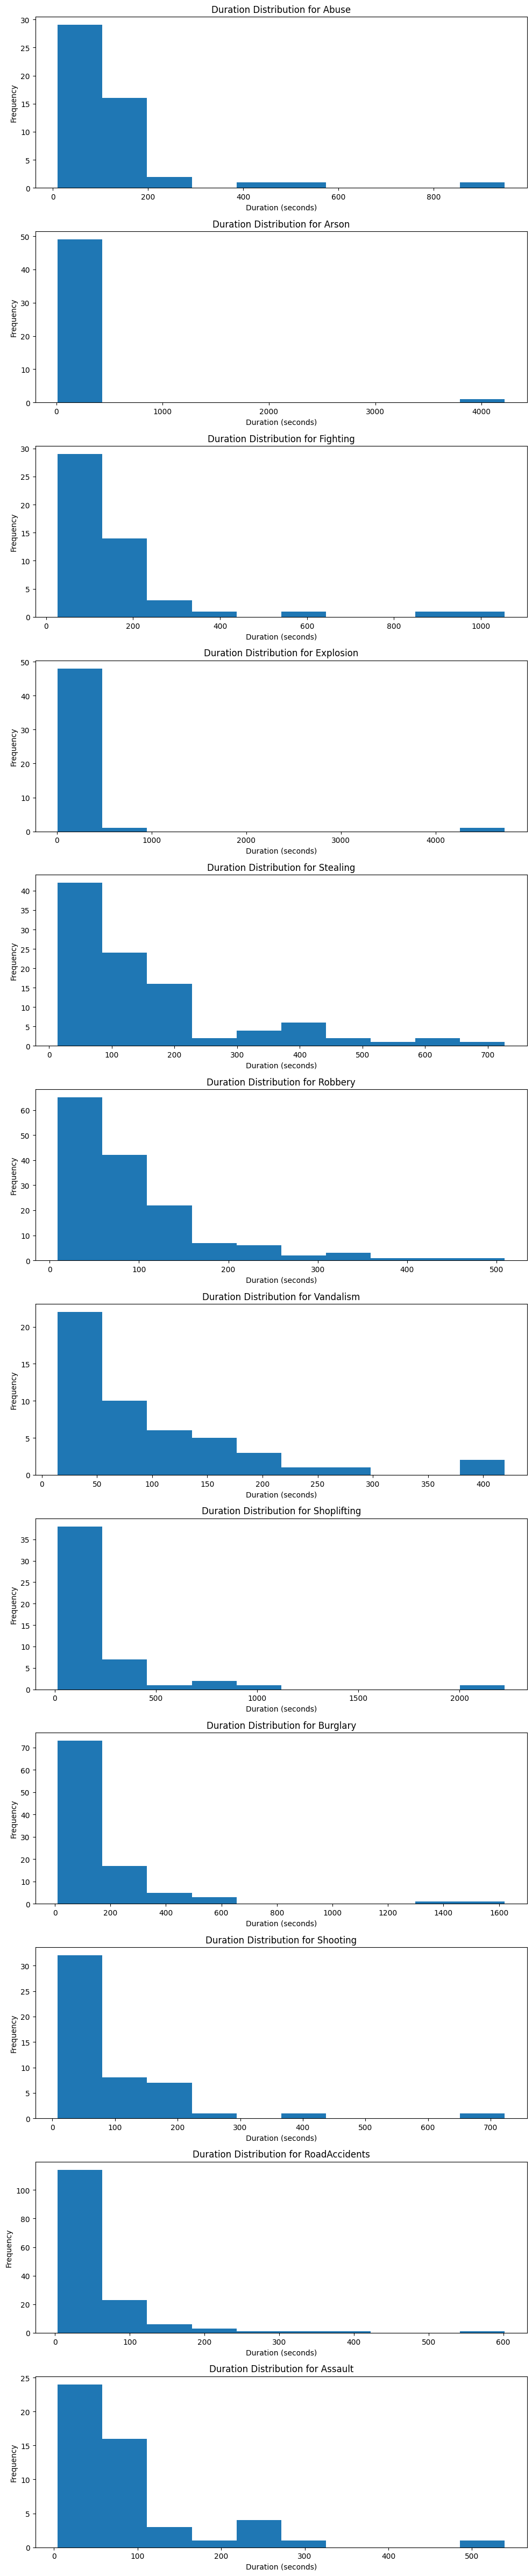

In [76]:
# prompt: a full plot where each row will display a specific anomaly and a histogram to display the range of durations

import matplotlib.pyplot as plt
# Create a dictionary to store the durations for each anomaly type
anomaly_durations = {
    "Abuse": abuse_durations,
    "Arson": arson_durations,
    "Fighting": fighting_duration,
    "Explosion": explosion_durations,
    "Stealing": stealing_durations,
    "Robbery": robbery_durations,
    "Vandalism": vandalism_durations,
    "Shoplifting": shoplifting_durations,
    "Burglary": burglary_durations,
    "Shooting": shooting_durations,
    "RoadAccidents": roadaccidents_durations,
    "Assault": assault_durations
}

# Create the figure and axes
fig, axes = plt.subplots(nrows=len(anomaly_durations), ncols=1, figsize=(10, 4*len(anomaly_durations)))

# Iterate over the anomaly types and plot the histograms
for i, (anomaly_type, durations) in enumerate(anomaly_durations.items()):
  ax = axes[i]
  ax.hist(durations, bins=10)
  ax.set_title(f"Duration Distribution for {anomaly_type}")
  ax.set_xlabel("Duration (seconds)")
  ax.set_ylabel("Frequency")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()
